<a href="https://colab.research.google.com/github/michellssgui22/PROJETOS_ESTUDO/blob/main/Mini_Projeto_Roof_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Projeto - Roof Imóveis
### Michel Souza Santana - 13923
> Entrega 01 - Slot 03

## Contextualização
* Roof Imóveis é uma das maiores empresas do ramo imobiliário Brasileiro
e quer expandir sua área de atuação fazendo um investimento internacional,
com isso, ela contratou você para uma consultoria estratégica.
* A empresa irá investir em imóveis no Condado de County, nos Estados
Unidos.
* Utilizando o dataset disponibilizado, você irá aplicar os conceitos de
CRISP-DM aprendidos até o momento em um projeto prático, que busca
desenvolver seu pensamento analítico, insights e tomada de decisões.

## King County - Condado de King - Washington
* O Condado de King é um dos 39 condados do estado americano de
Washington. A sede e cidade mais populosa do condado é Seattle.
* Foi fundado em 1852. Com mais de 2,2 milhões de habitantes, de acordo
com o censo nacional de 2020, é o condado mais populoso do estado e o 12o
mais populoso do país. Wikipédia
* O Dataset apresenta a venda de imóveis e suas características na região
de Maio de 2014 à Maio de 2015. Tem um total de 21613 registros com um total
de 21 atributos.

> Dataset: https://www.kaggle.com/harlfoxem/housesalesprediction

> Dataset detalhado: https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/

### 1.2 Descrevendo os dados:
O Dataset objeto deste jupyter notebook é referente aos dados de venda de imóveis em *King's County*, condado do estado americano de Washington, entre maio de 2014 e maio de 2015.

Segue a descrição dos dados contindos no referido dataset:

variável | Descrição
----|----
id |	Número de identificação do imóvel
date |	Data da venda
price |	Preço do imóvel na venda
bedrooms |	Número de quartos
bathrooms |	Número de banheiros
sqft_liv |	Tamanho da área habitável, em pés quadradps (square feet).
sqft_lot |	Tamanho do lote do imóvel, em pés quadradps (square feet).
floors | 	Número de andares
waterfront |	Classificação de beira-mar. ‘1’ se a propriedade é beira-mar, ‘0’ em caso negativo.
view |	Classificação de 0 a 4 do quão boa é a visão da propriedade.
condition |	Condição do imóvel, classificado de 1 a 5.
grade |	Classificação da qualidade da construção e materiais. Indicadores de 1 a 13. Mais informações no site governamental do [condado](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#g).
sqft_above |	Área de construção acima do térreo.
sqft_basmt |	Área de construção abaixo do solo.
yr_built |	Ano de construção.
yr_renov |	Ano de renovação. '0' se nunca renovado.
zipcode |	Código postal americano contendo 5 dígitos.
lat |	Latitude.
long |	Longitude.
squft_liv15 |	Média de tamanho interior das 15 casas mais próximas, em pés quadrados.
squft_lot15 |	Média de tamanho dos lotes das 15 casas mais próximas, em pés quadrados.


## O Que Devo Fazer?
* A empresa te contratou pois quer saber qual seria os 5 imóveis que
ela deveria investir e o porquê e quais 5 você não recomendaria o
investimento de jeito nenhum.
* Você deve montar um colab bem redigido mostrando o passo a
passo das etapas de análise do case, fazendo uma introdução e dados
atuais sobre o problema.
* Também é importante ressaltar/explicar passagens complexas
ou insights que você tiver durante a resolução desse projeto.

## A Questão de Negócio:

#### Qual a meta?

#### Como posso chegar?

## Entendimento do Negócio:

#### Quais dados eu tenho disponível?

#### Eles são relevantes para o problema?

#### Eles me trazem uma solução direta?

#### Qual o meu setor ou range de negócio?

## A Coleta de Dados:

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importadas as bibliotecas, realizamos a visualização de parte do Dataframe, a fim de verificarmos o formato e disposição dos dados:

In [104]:
# importando dataframe com pandas, declarando a variável "df" como nosso dataframe principal do projeto.
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Os dados que eu tenho fazem sentido?

* Sim, os dados estam bem distribuídos e possuem poucos elementos a serem formatados os quais serão tratados nos próximos blocos.

In [105]:
#Verificando o formato do dataframe
print(df.shape)

(21613, 21)


In [106]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [107]:
# Descrição estatística das colunas do dataframe.
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [108]:
 # Checando a existência de dado nulos no DF
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Estão no formato que eu gostaria?

* O campo "date" precisa ser formatado para melhor interação durante a análise

In [109]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* Verificando a presença de dados duplicados 

In [110]:
df[df.duplicated(subset='id', keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


#### O que mais eu consigo obter de informação destes dados?

In [111]:
df[df.duplicated(subset='id', keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


## A Limpeza de Dados:

#### Remoção de dados outliers e valores ausentes

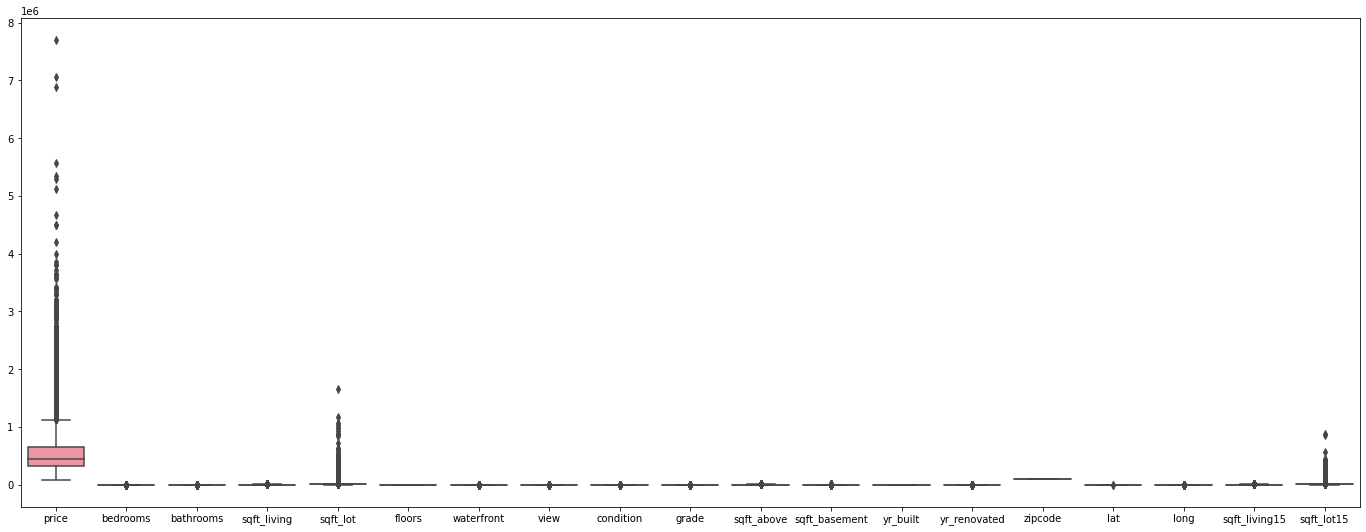

In [112]:
plt.figure(figsize=(24, 9))
sns.boxplot(data=df.drop('id', axis=1));

> Observando a distribuição dos outliers neste gráfico, tivemos sucesso em analisar as mesmas ocorrências na visualização de outros parâmetros, o que nos levou a decisão apontada acima, acerce de manter essas ocorrências deviantes na análise.

> É possível verificar disposição muito similar especialmente entre os gráficos de preço e área habitável (sqft_living).

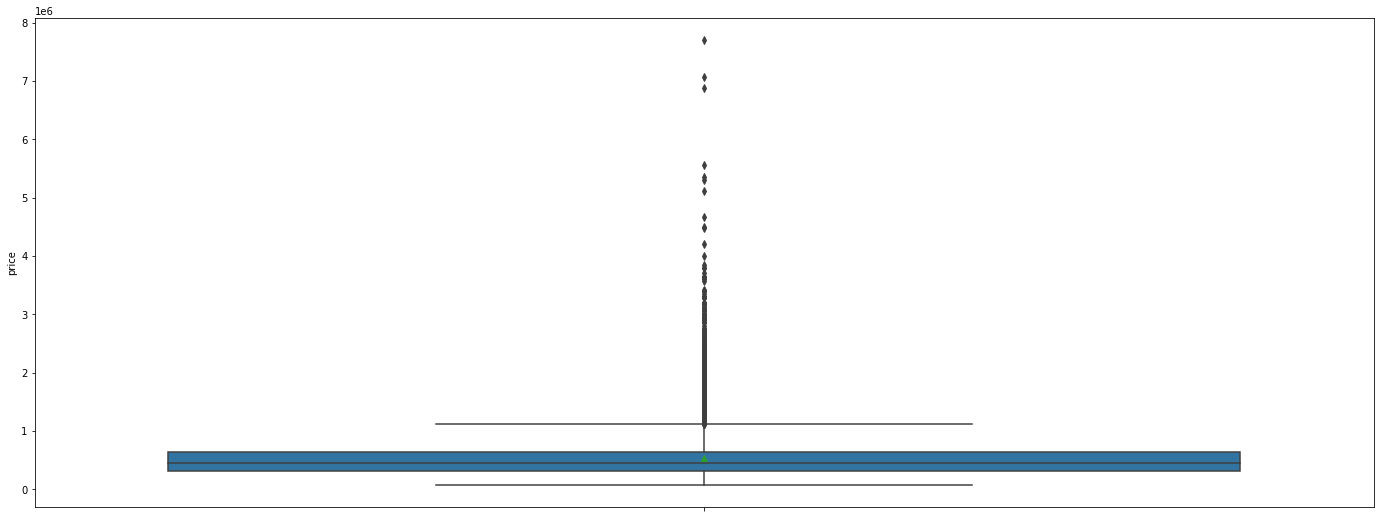

In [113]:
# Gráfico boxplot de preço do dataframe completo.
plt.figure(figsize=(24, 9))
sns.boxplot(y='price',data=df, showmeans = True);

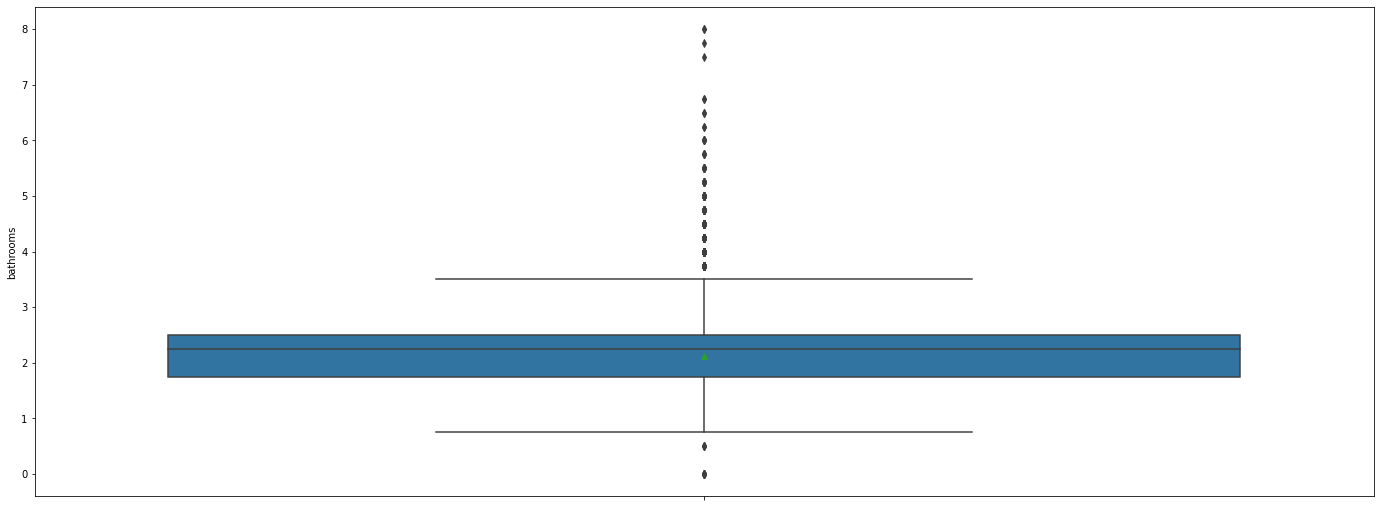

In [114]:
# Gráfico boxplot da quantidade de banheiros
plt.figure(figsize=(24, 9))
sns.boxplot(y='bathrooms',data=df, showmeans = True);

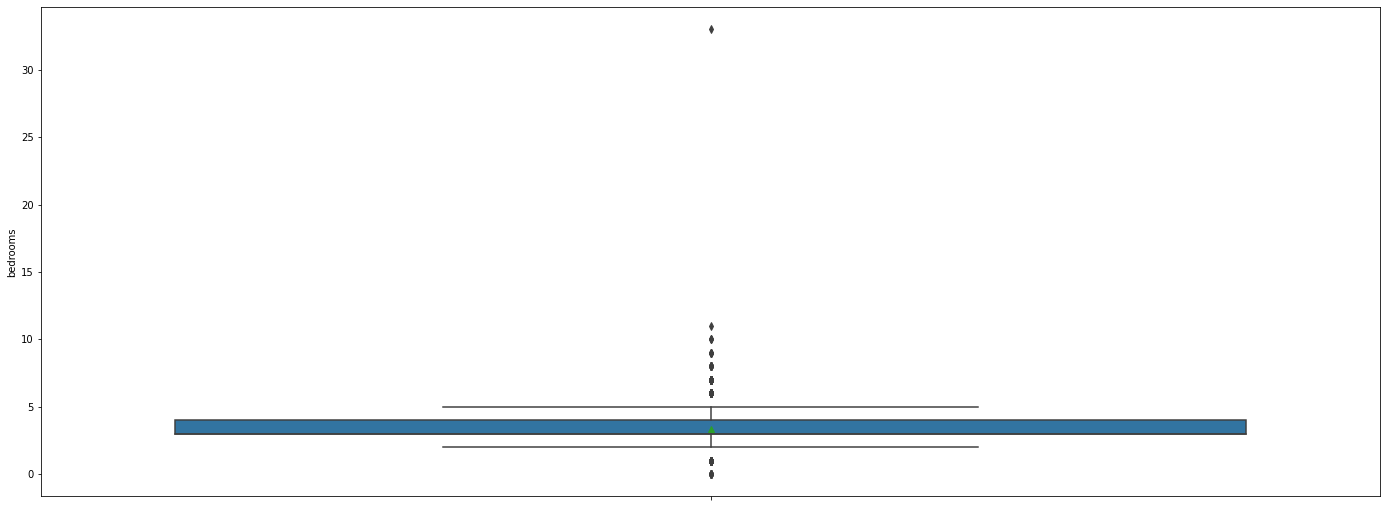

In [115]:
# Gráfico boxplot da quantidade de quartos.
plt.figure(figsize=(24, 9))
sns.boxplot(y='bedrooms', data=df, showmeans = True);

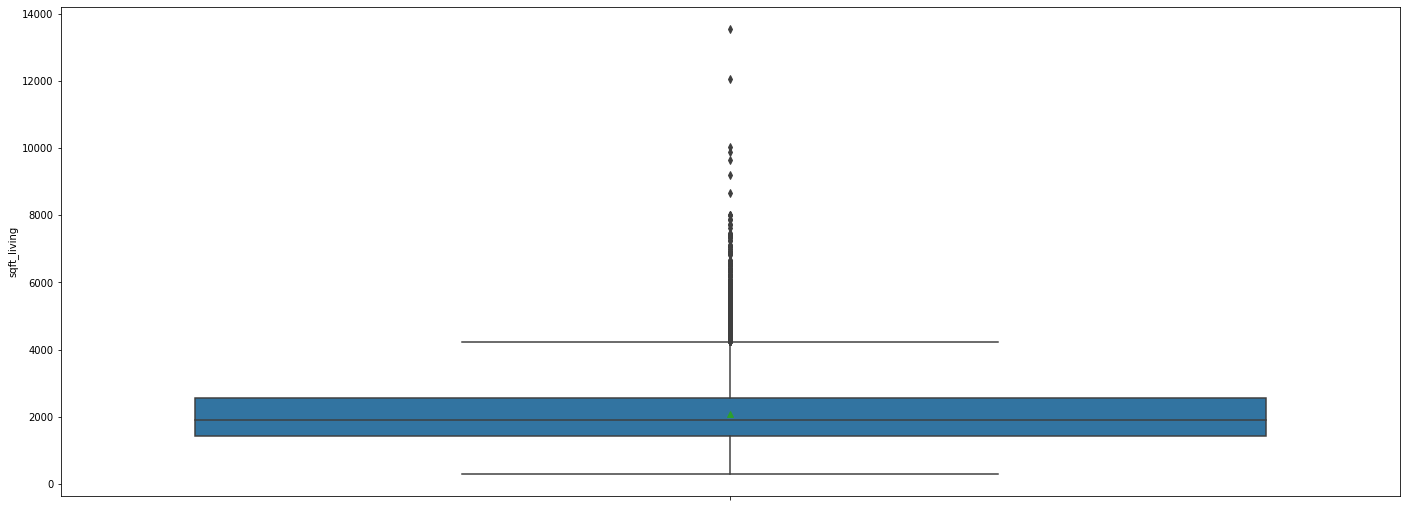

In [116]:
# Gráfico boxplot de área habitável.
plt.figure(figsize=(24, 9))
sns.boxplot(y='sqft_living',data=df, showmeans = True);

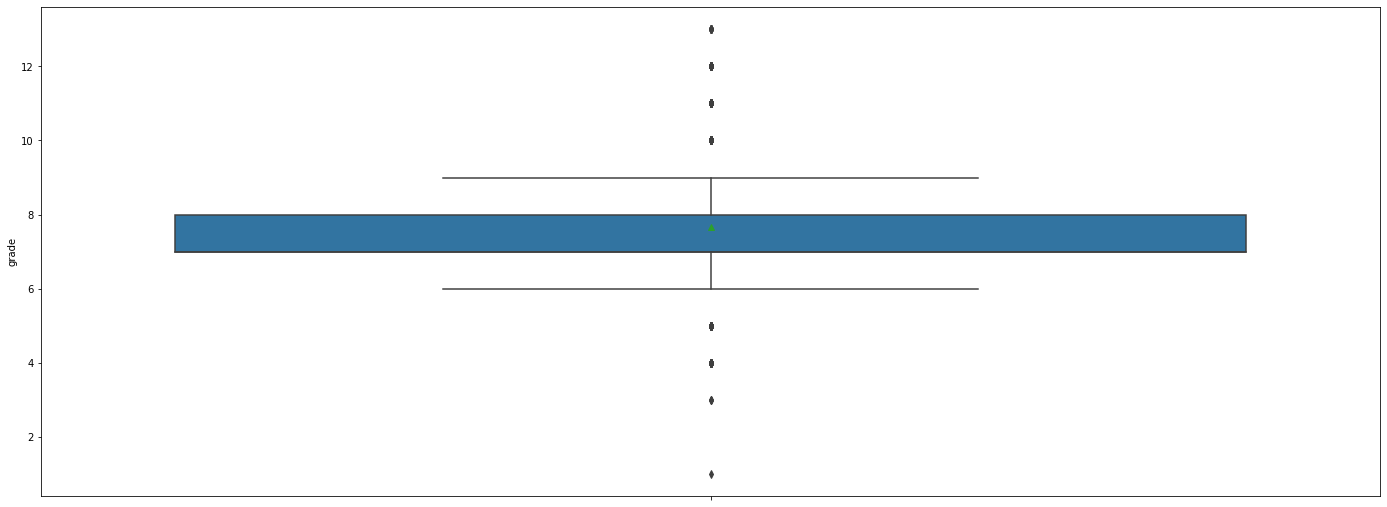

In [117]:
# Gráfico da coluna 'grade'
plt.figure(figsize=(24, 9))
sns.boxplot(y='grade',data=df, showmeans = True);

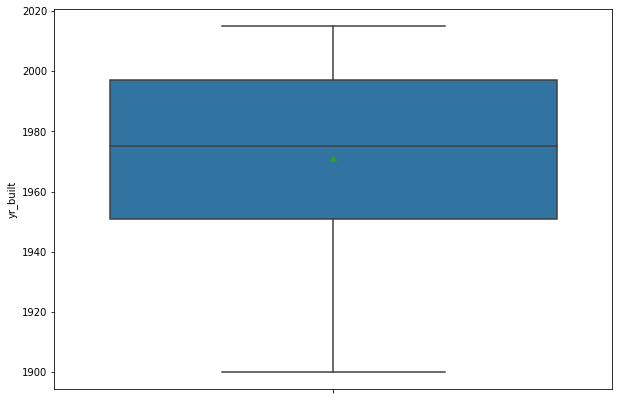

In [118]:
# Gráfico do ano de construção
plt.figure(figsize=(10, 7))
sns.boxplot(y='yr_built',data=df, showmeans = True);

In [119]:
df[df.duplicated(subset='id', keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20779,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598
21580,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,...,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000


#### Visualização dos dados

In [120]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Quais as minhas métricas essenciais

>> Encontre a cidade de cada imóvel;

In [121]:
# importando a biblioteca de request:

import requests

# definindo a url alvo da nossa pesquisa

url = 'https://www.zipdatamaps.com/king-wa-county-zipcodes'

#   definindo nossa Header, que servir de identificação como um navegador
# comum, e não do pandas.

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

#   Enviando o o pedido ao site, dessa vez apontando nosso Header, e nos identificando
# como navegador.

r = requests.get(url, headers=header)


df_zip_city = pd.read_html(r.text)


#  importado todos os dados da html que foram interpretados pelo pandas como df.
#Agora iremos achar tabela de nosso interesse, que está dentro da lista de
#objetos:

df_zip_city = df_zip_city[1]
df_zip_city

#   Na verdade nossa tabela está dentro de uma coluna de uma tabela maior. 
#Iremos extraí-la de lá com a seguinte linha de código:

df_zip_city = df_zip_city['List of All Zipcodes in King County, Washington']

#   Vamos aproveitar pra tirar os dados que não são úteis. Vamos dropar as colunas
# População e Zip-Type, bem como renomear as colunas úteis (Cidade e Código postal).

# Por fim, iremos transformar a coluna de zipcode em números inteiros, uma vez que
#não iremos usá-los para operações, e o float point pode ser problemático futuramente.

df_zip_city.drop(['Population', 'ZIP Type'], axis=1, inplace=True)
df_zip_city.dropna(axis=0, inplace=True)
df_zip_city['ZIP Code'] = df_zip_city['ZIP Code'].astype(int)
df_zip_city.columns = ['Zip Code', 'City']

df_zip_city.head()

,Zip Code,City
0,98001,Auburn
1,98002,Auburn
2,98003,Federal Way
3,98004,Bellevue
4,98005,Bellevue


In [122]:
#Criando a coluna:

df['City'] = df['zipcode'].map(df_zip_city.set_index('Zip Code')['City'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Seattle
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish


>> Calcule o preço por área de imóvel;

In [123]:
df['price-for-sqft_living'] = df['price'] / df['sqft_living']  
df['price-for-sqft_lot'] = df['price'] / df['sqft_lot']  
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,price-for-sqft_living,price-for-sqft_lot
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,Seattle,188.050847,39.274336
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,Seattle,209.338521,74.288870
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,Kenmore,233.766234,18.000000
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,Seattle,308.163265,120.800000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,Sammamish,303.571429,63.118812


>> Calcule o lucro/ perda de investimento caso o imóvel seja vendido mais de uma vez naquele período.

#### Analisando imóveis com vendas múltiplas

> Uma vez feita a análise dos dados, conforme passos anteriores, foi levantada a questão de como seria verificada a valorização de um imóvel, a fim de que pudessemos localizar outros bens com as mesmas características.

> Levando em consideração que o objetivo deste projeto deverá ser atingido sem a utilização de modelos de Machine Learning, a conclusão que chegamos foi que o jeito mais prático de avaliar os imóveis em relação ao seu potencial de valorização, seria analisar os imóveis que foram vendidos mais de uma vez. Assim, a valorização poderia ser observada de forma objetiva.

> Dessa análise, levando em consideração a diferença de preço entre duas alienações do mesmo imóvel, e observando o período de tempo entre ambas, seria possível inferir a valorização do bem.

> Deste modo, o objetivo desta seção do projeto é fazer a análise estatística destes imóveis com múltiplas vendas (que já sabemos que existem, graças a análise do item 2.1.1 deste notebook), e verificar se é possível traçar um perfil que temos interesse (seja de imóvel com alto ou baixo potencial de valorização).

In [124]:
#contando quantas vezes os imóveis com mais de uma venda foram vendidos
#Apenas um foi vendido 3 vezes, o resto foi duas vezes.

df[df.id.duplicated(keep=False)]['id'].value_counts(sort=True)

795000620     3
6021501535    2
3935900232    2
1217000340    2
9238500040    2
             ..
2621600015    2
2206700215    2
2787460720    2
3883800011    2
7853420110    2
Name: id, Length: 176, dtype: int64

> Todos os imóveis com vendas múltiplas foram vendidos duas vezes, exceto um, que foi alienado em 3 ocasiões.

> Trata-se do Imóvel '795000620':
* Realizada a verificação dos valores deste imóvel pois sendo o que foi vendido por mais poderia-se verificar um padrão de valorização ou desvalorização deste.
* Com base nas datas das vendas e no aumento dos valores fica óbvio a valorização deste imóvel.

In [125]:
df[df['id'] == 795000620]['price']

17602    115000.0
17603    124000.0
17604    157000.0
Name: price, dtype: float64

> Analisando os preços de alienação do referido imóvel, constatou-se a valorização constante do mesmo no período englobado pelos dados.

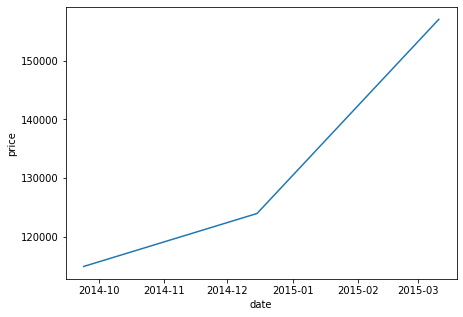

In [126]:
plt.figure(figsize=(7,5))
sns.lineplot(y='price', x='date', data=df[df['id'] == 795000620]);

In [127]:
#DF, esse só com os imóveis com mais de uma venda:

df[df.duplicated(subset='id', keep=False)]

# 1. Declarando novo df com os dados da primeira venda dos dos imóveis que tem
# multiplas vendas.

df_multsells = df[df.duplicated(subset='id', keep='last')]

# 2. Obtendo os valores de data e preço dos mesmos imóveis, só que agora da última
# venda.

df_lastsell = pd.DataFrame(df[df.duplicated(subset='id', keep='first')]['price'])
df_lastsell_date = pd.DataFrame(df[df.duplicated(subset='id', keep='first')]['date'])

# 3.  Adicionando as colunas do último preço e última data no dataframe, para 
# compararmos os preços lado a lado.

df_multsells.insert(loc=2, column='last date', value=df_lastsell_date)
df_multsells.insert(loc=4, column='last price', value=df_lastsell)

# 4. Adicionando uma coluna de diferença entre os preços e datas. 
#    A diferença de data é obtida no formato timedelta65. Foi realizada a 
# conversão para números inteiros.

df_multsells.insert(loc=3, column='date difference', value= (df_multsells['last date'] - df_multsells['date']).astype('timedelta64[D]').astype(int))
df_multsells.insert(loc=6, column='price difference', value=df_multsells['last price']-df_multsells['price'])

# 5. Adicionando uma coluna do % de diferença de preços, mantendo apenas 2 casas
# decimais

df_multsells.insert(loc=7, column='price difference %', value= (df_multsells['price difference'] / df_multsells['price'] * 100).round(decimals=2))

# 6. Deletando variáveis que não serão mais usadas:

del df_lastsell
del df_lastsell_date

df_multsells.head()

,id,date,last date,date difference,price,last price,price difference,price difference %,bedrooms,bathrooms,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,price-for-sqft_living,price-for-sqft_lot
93,6021501535,2014-07-25,2014-12-23,151,430000.0,700000.0,270000.0,62.79,3,1.50,...,1939,0,98117,47.6870,-122.386,1570,4500,Seattle,272.151899,86.000000
313,4139480200,2014-06-18,2014-12-09,174,1384000.0,1400000.0,16000.0,1.16,4,3.25,...,1997,0,98006,47.5503,-122.102,3860,11244,Bellevue,322.610723,114.351814
324,7520000520,2014-09-05,2015-03-11,187,232000.0,240500.0,8500.0,3.66,2,1.00,...,1922,1984,98146,47.4957,-122.352,1820,7460,Seattle,187.096774,19.186239
345,3969300030,2014-07-23,2014-12-29,159,165000.0,239900.0,74900.0,45.39,4,1.00,...,1943,0,98178,47.4897,-122.240,1020,7138,Seattle,165.000000,23.128680
371,2231500030,2014-10-01,2015-03-24,174,315000.0,530000.0,215000.0,68.25,4,2.25,...,1954,0,98133,47.7711,-122.341,1810,6929,Seattle,144.495413,29.291426


> Afim de assegurar a qualidade dos dados do novo dataframe, foram realizados dois testes:

1. A verificação de valor negativo para diferença de data entre as vendas, o que indicaria algum problema no código de seleção dos dados da primeira e segunda venda.

2. A verificação da existência de valor negativo na coluna 'price difference', o que indicaria a existência de um imóvel que teve desvalorização entre a primeira e última venda.

In [128]:
print(f"Existe erro na coleta da selação de data: {(df_multsells['date difference'] < 0).any().any()}")
print(f"Existe desvalorização em algum imóvel: {(df_multsells['price difference'] < 0).any().any()}")

Existe erro na coleta da selação de data: False
Existe desvalorização em algum imóvel: True


> Levando em consideração que no nosso dataframe principal já possui uma coluna de preço por área, foi também adicionada a coluna de preço por área baseada no preço da última venda dos imóveis:

In [129]:
df_multsells.insert(loc=27, column='last price-for-sqft_living', value= df_multsells['last price'] / df_multsells['sqft_living'])
df_multsells.head()

,id,date,last date,date difference,price,last price,price difference,price difference %,bedrooms,bathrooms,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,last price-for-sqft_living,price-for-sqft_living,price-for-sqft_lot
93,6021501535,2014-07-25,2014-12-23,151,430000.0,700000.0,270000.0,62.79,3,1.50,...,0,98117,47.6870,-122.386,1570,4500,Seattle,443.037975,272.151899,86.000000
313,4139480200,2014-06-18,2014-12-09,174,1384000.0,1400000.0,16000.0,1.16,4,3.25,...,0,98006,47.5503,-122.102,3860,11244,Bellevue,326.340326,322.610723,114.351814
324,7520000520,2014-09-05,2015-03-11,187,232000.0,240500.0,8500.0,3.66,2,1.00,...,1984,98146,47.4957,-122.352,1820,7460,Seattle,193.951613,187.096774,19.186239
345,3969300030,2014-07-23,2014-12-29,159,165000.0,239900.0,74900.0,45.39,4,1.00,...,0,98178,47.4897,-122.240,1020,7138,Seattle,239.900000,165.000000,23.128680
371,2231500030,2014-10-01,2015-03-24,174,315000.0,530000.0,215000.0,68.25,4,2.25,...,0,98133,47.7711,-122.341,1810,6929,Seattle,243.119266,144.495413,29.291426


> Por fim, levando em consideração que as informações de alteração de valor (preço e percentual) dos imóveis até o momento não levaram em consideração o tempo que passou entre a primeira e última alienação, foi criada uma coluna de valorização por dia, chamada de "valorization per day".
* Obs: A referida coluna pode, e inclusive terá, valores negativos. Nesse caso, são imóveis que tiveram desvalorização ao longo do período de análise entre as duas vendas.

In [133]:
df_multsells.insert(loc=8, column='valorization per day', value= df_multsells['price difference %'] / df_multsells['date difference'])
df_multsells.sort_values(by='valorization per day', ascending=False)

,id,date,last date,date difference,price,last price,price difference,price difference %,valorization per day,bedrooms,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,City,last price-for-sqft_living,price-for-sqft_living,price-for-sqft_lot
10253,2422049104,2014-09-15,2014-12-30,106,85000.0,235000.0,150000.0,176.47,1.664811,2,...,0,98032,47.3813,-122.243,1160,7680,Kent,283.132530,102.409639,9.444444
15810,7129304540,2014-12-20,2015-05-14,145,133000.0,440000.0,307000.0,230.83,1.591931,5,...,0,98118,47.5192,-122.266,1860,5980,Seattle,307.692308,93.006993,23.750000
13628,2023049218,2014-07-16,2015-03-16,243,105500.0,445000.0,339500.0,321.80,1.324280,2,...,0,98148,47.4611,-122.324,1620,8584,Seattle,478.494624,113.440860,13.630491
12377,7899800045,2014-08-28,2014-12-02,96,107000.0,232900.0,125900.0,117.66,1.225625,3,...,0,98106,47.5238,-122.356,1410,5132,Seattle,255.934066,117.582418,20.898438
8274,3883800011,2014-11-05,2015-04-08,154,82000.0,219900.0,137900.0,168.17,1.092013,3,...,0,98146,47.4987,-122.341,1140,11250,Seattle,255.697674,95.348837,7.864953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10610,2767603612,2014-05-12,2015-01-13,246,500000.0,489000.0,-11000.0,-2.20,-0.008943,2,...,0,98107,47.6719,-122.382,1350,1334,Seattle,379.069767,387.596899,374.812594
7845,4139420590,2014-05-20,2014-08-27,99,1212500.0,1200000.0,-12500.0,-1.03,-0.010404,4,...,0,98006,47.5521,-122.115,4060,15177,Bellevue,263.157895,265.899123,72.853452
15277,2619920170,2014-10-01,2014-12-19,79,772500.0,765000.0,-7500.0,-0.97,-0.012278,4,...,0,98033,47.6874,-122.161,3220,5083,Kirkland,236.842105,239.164087,180.069930
13298,7167000040,2014-08-13,2015-03-05,204,740000.0,700000.0,-40000.0,-5.41,-0.026520,4,...,0,98010,47.3602,-121.988,3350,183897,Black Diamond,208.955224,220.895522,3.713871


> Antes do próximo passo, faremos uma visualização gráfica de uma tabela de correlações desse nosso novo dataframe:

In [134]:
df_multsells.corr().style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.8/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,date difference,price,last price,price difference,price difference %,valorization per day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,last price-for-sqft_living,price-for-sqft_living,price-for-sqft_lot
id,1.000000,0.147813,0.227482,0.251772,0.068754,-0.072984,-0.049010,0.049667,0.100852,0.156099,0.002872,0.081670,nan,0.102563,0.028399,0.207467,0.135968,0.076574,0.077212,0.024373,-0.036621,0.118234,0.192467,0.151139,0.015975,0.171690,0.192684,0.174623
date difference,0.147813,1.000000,0.110014,0.154845,0.127587,0.050066,-0.336164,-0.016356,0.082290,0.048456,0.021113,0.125248,nan,0.018051,0.012385,0.057448,0.016154,0.063417,-0.014612,-0.050046,0.168414,-0.015242,-0.053237,0.069057,0.021144,0.171368,0.104587,0.178570
price,0.227482,0.110014,1.000000,0.938552,-0.177443,-0.467184,-0.470018,0.198934,0.517831,0.742958,0.331248,0.352010,nan,0.508825,0.198762,0.751014,0.677974,0.317539,0.302396,0.007505,-0.281917,0.347718,0.275204,0.764489,0.231213,0.378187,0.697330,0.520227
last price,0.251772,0.154845,0.938552,1.000000,0.173123,-0.216672,-0.275439,0.223570,0.471010,0.713573,0.287287,0.299239,nan,0.447585,0.192259,0.701762,0.611116,0.365917,0.165042,-0.016188,-0.177381,0.455346,0.165484,0.695848,0.169576,0.529421,0.654120,0.477996
price difference,0.068754,0.127587,-0.177443,0.173123,1.000000,0.715351,0.555870,0.069802,-0.134657,-0.085444,-0.126090,-0.151255,nan,-0.175756,-0.018987,-0.142111,-0.192148,0.137238,-0.392324,-0.067576,0.298703,0.306117,-0.313469,-0.197428,-0.176268,0.430386,-0.124762,-0.121576
price difference %,-0.072984,0.050066,-0.467184,-0.216672,0.715351,1.000000,0.849031,-0.102492,-0.367965,-0.371939,-0.148403,-0.265223,nan,-0.210156,-0.191324,-0.408020,-0.392313,-0.078453,-0.393194,-0.103022,0.288043,-0.118396,-0.345034,-0.383415,-0.163207,0.181196,-0.410377,-0.356691
valorization per day,-0.049010,-0.336164,-0.470018,-0.275439,0.555870,0.849031,1.000000,-0.083629,-0.334966,-0.363472,-0.139645,-0.264251,nan,-0.192928,-0.129477,-0.388902,-0.349892,-0.127633,-0.286877,-0.105795,0.147314,-0.123390,-0.239904,-0.389069,-0.150770,0.041982,-0.435880,-0.386355
bedrooms,0.049667,-0.016356,0.198934,0.223570,0.069802,-0.102492,-0.083629,1.000000,0.425254,0.496873,0.023820,0.187933,nan,0.068826,0.073334,0.200416,0.389412,0.309761,0.187685,0.069885,-0.042682,0.130771,0.074612,0.203640,0.047288,-0.265967,-0.146951,0.043564
bathrooms,0.100852,0.082290,0.517831,0.471010,-0.134657,-0.367965,-0.334966,0.425254,1.000000,0.753901,0.188682,0.520160,nan,0.300863,0.127418,0.628667,0.694213,0.312700,0.549837,-0.061871,-0.262246,0.135163,0.320219,0.570883,0.170496,-0.181284,0.087921,0.393988
sqft_living,0.156099,0.048456,0.742958,0.713573,-0.085444,-0.371939,-0.363472,0.496873,0.753901,1.000000,0.379698,0.399338,nan,0.395385,0.162598,0.775820,0.834756,0.545761,0.437173,0.057535,-0.262657,0.231447,0.345198,0.757611,0.286081,-0.143247,0.137753,0.270043


#### Baseado nos dados, qual imóvel ou tipo de imóveis eu deveria comprar